In [46]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
data = pd.read_csv("Churn_Modelling.csv")
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.drop("RowNumber", axis='columns', inplace=True)

In [5]:
data.drop("CustomerId", axis='columns', inplace=True)

In [6]:
data.head(5)

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
data.drop("Surname", axis='columns', inplace=True)

In [9]:
data.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
def print_unique_val():
  for i in data.columns:
    if i != 'CreditScore': 
      print(f'{i} --> {data[i].unique()}')
print_unique_val()

Geography --> ['France' 'Spain' 'Germany']
Gender --> ['Female' 'Male']
Age --> [42 41 39 43 44 50 29 27 31 24 34 25 35 45 58 32 38 46 36 33 40 51 61 49
 37 19 66 56 26 21 55 75 22 30 28 65 48 52 57 73 47 54 72 20 67 79 62 53
 80 59 68 23 60 70 63 64 18 82 69 74 71 76 77 88 85 84 78 81 92 83]
Tenure --> [ 2  1  8  7  4  6  3 10  5  9  0]
Balance --> [     0.    83807.86 159660.8  ...  57369.61  75075.31 130142.79]
NumOfProducts --> [1 3 2 4]
HasCrCard --> [1 0]
IsActiveMember --> [1 0]
EstimatedSalary --> [101348.88 112542.58 113931.57 ...  42085.58  92888.52  38190.78]
Exited --> [1 0]


In [13]:
data['Gender'] = data['Gender'].map({'Male':1, "Female":0})
data.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data = pd.get_dummies(data=data, columns=['Geography'])

In [16]:
data.head(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [18]:
print_unique_val()

Gender --> [0 1]
Age --> [42 41 39 43 44 50 29 27 31 24 34 25 35 45 58 32 38 46 36 33 40 51 61 49
 37 19 66 56 26 21 55 75 22 30 28 65 48 52 57 73 47 54 72 20 67 79 62 53
 80 59 68 23 60 70 63 64 18 82 69 74 71 76 77 88 85 84 78 81 92 83]
Tenure --> [ 2  1  8  7  4  6  3 10  5  9  0]
Balance --> [     0.    83807.86 159660.8  ...  57369.61  75075.31 130142.79]
NumOfProducts --> [1 3 2 4]
HasCrCard --> [1 0]
IsActiveMember --> [1 0]
EstimatedSalary --> [101348.88 112542.58 113931.57 ...  42085.58  92888.52  38190.78]
Exited --> [1 0]
Geography_France --> [1 0]
Geography_Germany --> [0 1]
Geography_Spain --> [0 1]


In [19]:
data[['Balance', 'EstimatedSalary']].describe()

,Balance,EstimatedSalary
count,10000.000000,10000.000000
mean,76485.889288,100090.239881
std,62397.405202,57510.492818
min,0.000000,11.580000
25%,0.000000,51002.110000
50%,97198.540000,100193.915000
75%,127644.240000,149388.247500
max,250898.090000,199992.480000


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Gender             10000 non-null  int64  
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Exited             10000 non-null  int64  
 10  Geography_France   10000 non-null  uint8  
 11  Geography_Germany  10000 non-null  uint8  
 12  Geography_Spain    10000 non-null  uint8  
dtypes: float64(2), int64(8), uint8(3)
memory usage: 810.7 KB


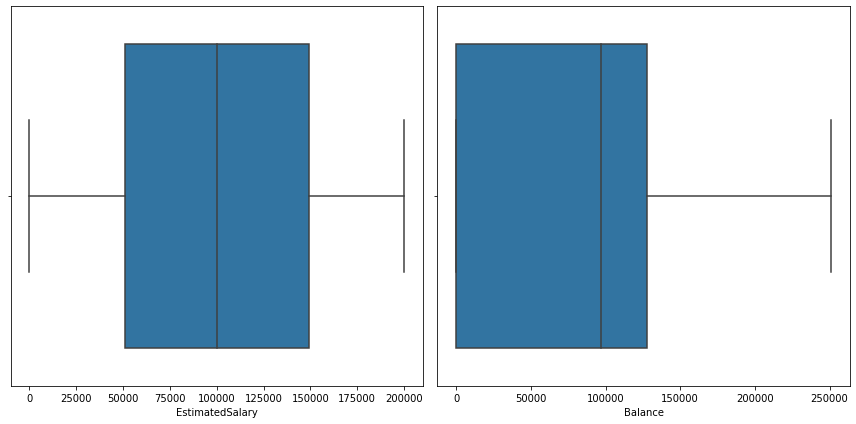

In [26]:
plt.rcParams["figure.figsize"] = [12,6] 
plt.rcParams["figure.autolayout"] = True 

fig, axes = plt.subplots(1, 2)
sb.boxplot(x = data['EstimatedSalary'], ax = axes[0],  showfliers = True)  
sb.boxplot(x = data['Balance'] , ax = axes[1], showfliers = True )

In [28]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [33]:
data['Age'] = data['Age']/92

In [34]:
data.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.545700,0.423063,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.501400,0.250900,0.247700
std,96.653299,0.497932,0.113998,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.500023,0.433553,0.431698
min,350.000000,0.000000,0.195652,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,0.000000,0.347826,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,1.000000,0.402174,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,1.000000,0.000000,0.000000
75%,718.000000,1.000000,0.478261,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,1.000000,0.000000
max,850.000000,1.000000,1.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000


In [35]:
data['CreditScore'] = data['CreditScore']/850
data['Balance'] = data['Balance']/250898.09
data['EstimatedSalary'] = data['EstimatedSalary']/199992.48

In [37]:
#splitting
X = data.drop('Exited', axis=1)
y = data['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)


In [42]:
#ann
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
ann = Sequential([
        layers.Dense(1000, input_dim = len(X_train.columns), activation = 'relu'),
        layers.Dense(600, activation = 'relu'),
        layers.Dense(1, activation = 'sigmoid'),
    ])  
ann.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics = ['accuracy']
    )  
ann.fit(X_train, y_train, epochs=100)

Epoch 1/100
210/210 [==============================] - 3s 11ms/step - loss: 0.4709 - accuracy: 0.7984
Epoch 2/100
210/210 [==============================] - 2s 10ms/step - loss: 0.4157 - accuracy: 0.8240
Epoch 3/100
210/210 [==============================] - 2s 12ms/step - loss: 0.3840 - accuracy: 0.8343
Epoch 4/100
210/210 [==============================] - 2s 10ms/step - loss: 0.3770 - accuracy: 0.8415
Epoch 5/100
210/210 [==============================] - 2s 10ms/step - loss: 0.3669 - accuracy: 0.8464
Epoch 6/100
210/210 [==============================] - 2s 10ms/step - loss: 0.3639 - accuracy: 0.8458
Epoch 7/100
210/210 [==============================] - 2s 10ms/step - loss: 0.3625 - accuracy: 0.8469
Epoch 8/100
210/210 [==============================] - 2s 11ms/step - loss: 0.3588 - accuracy: 0.8524
Epoch 9/100
210/210 [==============================] - 2s 10ms/step - loss: 0.3620 - accuracy: 0.8484
Epoch 10/100
210/210 [==============================] - 2s 10ms/step - loss: 0.353

In [43]:
ann.evaluate(X_test, y_test)

104/104 [==============================] - 1s 3ms/step - loss: 0.7119 - accuracy: 0.8206


[0.7118566632270813, 0.8206060528755188]

In [44]:
y_pred = ann.predict(X_test)

In [47]:
y_classes = [np.argmax(element) for element in y_pred]

In [49]:
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      1.00      0.88      2609
           1       0.00      0.00      0.00       691

    accuracy                           0.79      3300
   macro avg       0.40      0.50      0.44      3300
weighted avg       0.63      0.79      0.70      3300



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
print("Confusion_matrix:  \n" , confusion_matrix(y_test, y_classes))

Confusion_matrix:  
 [[2609    0]
 [ 691    0]]
